<a href="https://colab.research.google.com/github/Veny1302/Analisis-Sentimen-MBG/blob/main/SENTIMEN_ANALISIS_LSTM_MBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk Sastrawi tensorflow scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

file_loc = r"https://raw.githubusercontent.com/Veny1302/Analisis-Sentimen-MBG/refs/heads/main/makanbergizigratis.csv"
data_scrape = pd.read_csv(file_loc)
data_scrape

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988024872963109143,Mon Nov 10 23:24:00 +0000 2025,0,Program MBG untuk anak Indonesia sehat dan cer...,1988024872963109143,https://pbs.twimg.com/media/G5biFiJasAAzwQT.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198802487296310...,1580097278475280384,NaN
1,1987837720790495527,Mon Nov 10 11:00:19 +0000 2025,0,Wapres Gibran perkuat Program Makan Bergizi Gr...,1987837720790495527,https://pbs.twimg.com/media/G5Y33ydXcAAOlVK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198783772079049...,1182569685981659136,NaN
2,1987818612997095818,Mon Nov 10 09:44:23 +0000 2025,1,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,1987818612997095818,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781861299709...,859471627108499456,NaN
3,1987810228944110060,Mon Nov 10 09:11:04 +0000 2025,1,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,1987810228944110060,https://pbs.twimg.com/media/G5Ye3jxbYAA-esg.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781022894411...,1852436707796545536,NaN
4,1987795274442657868,Mon Nov 10 08:11:39 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795274442657868,https://pbs.twimg.com/media/G5YRQl-aUAA0mK9.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779527444265...,1713751914977120256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,1971424750141612395,Fri Sep 26 04:01:02 +0000 2025,0,Program Makan Bergizi Gratis membuat generasi ...,1971424750141612395,https://pbs.twimg.com/media/G1voW10bEAAinQl.jpg,NaN,in,NaN,0,1,0,https://x.com/undefined/status/197142475014161...,1603264295051022336,NaN
3009,1971423065939779909,Fri Sep 26 03:54:20 +0000 2025,0,#Dpr #mbg #keracunanmbg #cipongkor #dadanhinda...,1971423065939779909,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/197142306593977...,994510171,NaN
3010,1971181108604830023,Fri Sep 26 03:46:11 +0000 2025,0,Program Makan Bergizi Gratis mantul #ManfaatMa...,1971421015180968086,NaN,Korea_K3BBQ,in,NaN,0,0,0,https://x.com/undefined/status/197142101518096...,1537011663773528064,NaN
3011,1971181108604830023,Fri Sep 26 03:46:07 +0000 2025,0,terus mendukungProgram Makan Bergizi Gratis #M...,1971420995862003761,NaN,Korea_K3BBQ,in,NaN,0,0,0,https://x.com/undefined/status/197142099586200...,1537011663773528064,NaN


###PREPROCESSING LENGKAP

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopword_indonesia = set(stopwords.words('indonesian'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from collections import Counter

# gabungkan teks
text = " ".join(data_scrape["full_text"].astype(str))

# bersihkan dasar
text_clean = re.sub(r"http\S+|www\S+"," ", text)
text_clean = re.sub(r"[^a-zA-ZÀ-ÿ\s]"," ", text_clean).lower()

# token
kata = text_clean.split()

# hitung frekuensi
kamus = Counter(kata)
kamus_df = pd.DataFrame(kamus.items(), columns=["kata","frekuensi"]).sort_values(by="frekuensi", ascending=False)

# top 200 kata jadi stopword otomatis
stopword_otomatis = kamus_df.head(200)["kata"].tolist()

# gabungkan dengan stopword indonesia
stopword_final = set(stopword_indonesia) | set(stopword_otomatis)

len(stopword_final)

881

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocessing(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"@\w+"," ", text)
    text = re.sub(r"#"," ", text)
    text = re.sub(r"[^a-zA-Z\s]"," ", text)
    text = re.sub(r"\s+"," ", text).strip()

    text = stemmer.stem(text)
    words = text.split()
    words = [w for w in words if w not in stopword_final]

    return " ".join(words)


In [ ]:
data_scrape["clean_text"] = data_scrape["full_text"].astype(str).apply(preprocessing)
data_scrape.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_text
0,1988024872963109143,Mon Nov 10 23:24:00 +0000 2025,0,Program MBG untuk anak Indonesia sehat dan cer...,1988024872963109143,https://pbs.twimg.com/media/G5biFiJasAAzwQT.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198802487296310...,1580097278475280384,NaN,
1,1987837720790495527,Mon Nov 10 11:00:19 +0000 2025,0,Wapres Gibran perkuat Program Makan Bergizi Gr...,1987837720790495527,https://pbs.twimg.com/media/G5Y33ydXcAAOlVK.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198783772079049...,1182569685981659136,NaN,wapres kolaborasi lintas simak berita lengkap ...
2,1987818612997095818,Mon Nov 10 09:44:23 +0000 2025,1,Anggota DPD RI Lia Istifhama MBG Bukti Nyata N...,1987818612997095818,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781861299709...,859471627108499456,NaN,anggota dpd ri lia istifhama surabaya liaistif...
3,1987810228944110060,Mon Nov 10 09:11:04 +0000 2025,1,Monitoring MBG SPPG Mitra Mandiri Al Muslimun ...,1987810228944110060,https://pbs.twimg.com/media/G5Ye3jxbYAA-esg.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198781022894411...,1852436707796545536,NaN,monitoring mitra mandiri al muslimun nusantara...
4,1987795274442657868,Mon Nov 10 08:11:39 +0000 2025,1,Program Makan Bergizi Gratis memberikan energi...,1987795274442657868,https://pbs.twimg.com/media/G5YRQl-aUAA0mK9.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198779527444265...,1713751914977120256,NaN,songsong


###LABELING SENTIMEN OTOMATIS

In [ ]:
!pip install textblob
!python -m textblob.download_corpora
from textblob import TextBlob


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positif"
    elif polarity < 0:
        return "negatif"
    else:
        return "netral"


In [ ]:
data_scrape["sentimen"] = data_scrape["clean_text"].apply(get_sentiment)
data_scrape["sentimen"].value_counts()

,count
sentimen,
netral,2947
positif,34
negatif,32


###TOKENISASI & PADDING UNTUK LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data_scrape["clean_text"])

X = tokenizer.texts_to_sequences(data_scrape["clean_text"])
X = pad_sequences(X, maxlen=100, padding="post")

# ubah label ke angka
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data_scrape["sentimen"])

###TRAIN–TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


###BANGUN MODEL LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(5000, 128, input_length=100),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###TRAINING MODEL

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.9575 - loss: 0.3268 - val_accuracy: 0.9735 - val_loss: 0.1450
Epoch 2/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.9800 - loss: 0.1246 - val_accuracy: 0.9735 - val_loss: 0.1422
Epoch 3/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.9797 - loss: 0.1239 - val_accuracy: 0.9735 - val_loss: 0.1472
Epoch 4/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.9805 - loss: 0.1220 - val_accuracy: 0.9735 - val_loss: 0.1467
Epoch 5/5
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.9792 - loss: 0.1243 - val_accuracy: 0.9735 - val_loss: 0.1438


###EVALUASI MODEL

In [ ]:
#@title Akurasi

loss, acc = model.evaluate(X_test, y_test)
print("Akurasi:", acc)



19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9740 - loss: 0.1406
Akurasi: 0.9734659790992737


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step


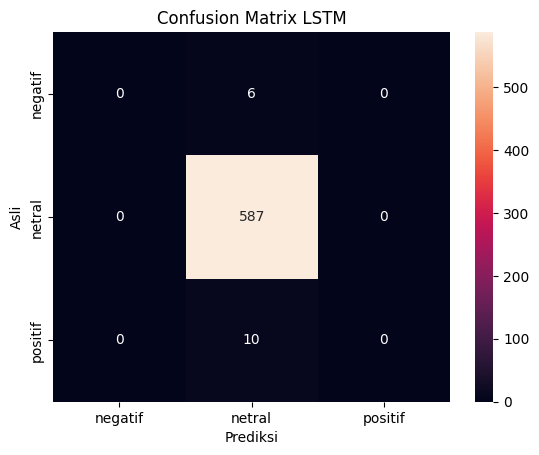

In [ ]:
#@title Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Asli")
plt.title("Confusion Matrix LSTM")
plt.show()


In [ ]:
model.save("sentiment_model.keras")

In [ ]:
import pickle

with open("tokenizer.pkl","wb") as f:
    pickle.dump(tokenizer, f)

with open("labelencoder.pkl","wb") as f:
    pickle.dump(le, f)
